In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *

In [2]:
omega0=14000
delta=-0e-4
omega=omega0*(1+delta)
omega0*delta,omega

(-0.0, 14000.0)

In [3]:

xcr = XCrystal(XCr_path+'/config/CrystalLiNbO.yaml',omega)
pp=xcr.configure(0,0)

In [4]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/CrystalLiNbO.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [5]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,-0.0058)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 1000/1000 [00:10<00:00, 97.61it/s]


Photon energy (omega):  14000.0 ; Reflectivity:  1.3939590568073398e-06 ; Transmission:  0.9932067913073808


In [6]:
xcr.z1[0]/xcr.convr,xcr.Z/xcr.convr,xcr.z0/xcr.convr,xcr.c_i

(-1.0916218816736058e-06,
 1.1452468612127734e-09,
 1.0916218816736058e-06,
 [1.0])

In [7]:
xcr.Z/xcr.convr-xcr.z0/xcr.convr

-1.090476634812393e-06

In [8]:
xcr.z1[0]/xcr.convr-xcr.z1[0]/xcr.convr

0.0

In [9]:
z11=np.linspace(0,xcr.Z*(xcr.M-1),xcr.M)-xcr.z0

In [10]:
((xcr.z1[0]-xcr.z1[0])/xcr.convr)/(xcr.Z/xcr.convr)

0.0

In [11]:
wu=np.linspace(-0.5,0.5,4001)
(wu[2]-wu[1])*4000

1.000000000000112

In [12]:
xcr.k0,xcr.d,xcr.dm

(0.3440564796571191, 9.13103760382787, 1.287e-10)

plt.plot(xcr.u[:,0,0],'+-')
plt.xlim(2950,3010)
#plt.ylim(0,-1)

In [13]:
xcr.HH/xcr.convr*1e6

2.0

In [14]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21)) # phase difference between U1_xyz and U2_xyz calculatef from energy 

In [15]:
Ints=np.abs(U1_xyz[0,:,0,:]*2e3 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,0,:]*0 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,0,:] + 0*U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,0,:])**2*20 + np.abs(U2_xyz[0,:,0,:])**2

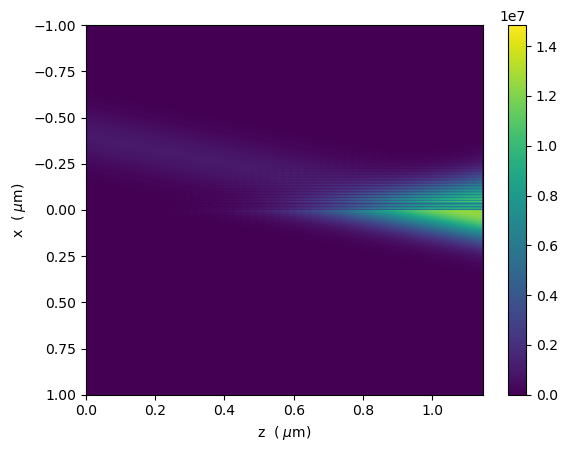

In [16]:
plt.imshow((Ints**1)*1e6,extent=[-xcr.M*xcr.Z/xcr.convr*1e6/2*0,xcr.M*xcr.Z/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6], aspect='auto')
#plt.imshow((Ints**1),extent=[-xcr.M*xcr.Z/xcr.convr*1e6/2*0,xcr.M*xcr.Z/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6], aspect='auto')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**0.5 + np.abs(U2_xyz[0,:,0,:])**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(150, 250)
#plt.xlim(-60,-40)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()

In [17]:
xcr.Z/xcr.convr,xcr.k0,xcr.dm,1.287000000000000*np.sqrt(8)

(1.1452468612127734e-09, 0.3440564796571191, 1.287e-10, 3.6401857095483465)

In [18]:
uy=np.linspace(0,1,1)
uy[0]
xcr.

AttributeError: 'XCrystal' object has no attribute 'E_in'

In [22]:
Eu1=U1_xyz[0,:,0,:] 
Eu2=U2_xyz[0,:,0,:] 
Eu1.shape,xcr.z1.shape



((4001, 501), (1000,))

81.25324130069674

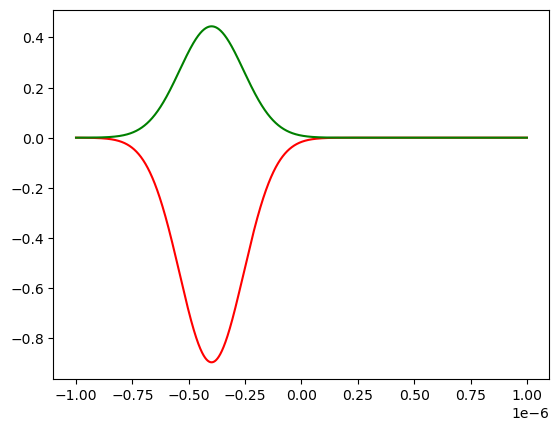

In [23]:
nz=1
plt.plot(xcr.xx/xcr.convr,np.real(Eu2[:,nz]),'r')
plt.plot(xcr.xx/xcr.convr,np.imag(Eu2[:,nz]),'g')
xcr.Z

(-1.090476634812393e-06, 1.0000231286143626)

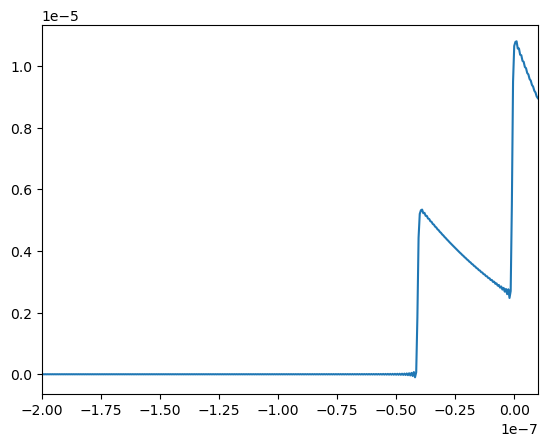

In [24]:

plt.plot(xcr.xx/xcr.convr,np.real(Eu1[:,nz]))
#plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-0.2e-6,0.01e-6)
En1=np.sum((np.abs(Eu1[:,nz]))**2)

xcr.z1[nz]/xcr.convr, np.max(np.abs(Eu2))

(4001, 501)

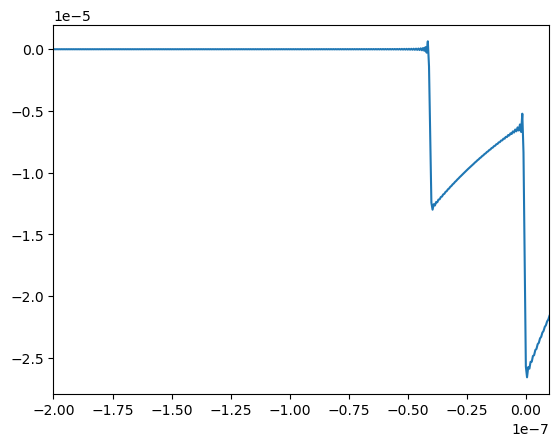

In [25]:

plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
#plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-0.2e-6,0.01e-6)
En1=np.sum((np.abs(Eu1[:,nz]))**2)
En1
Eu1.shape

In [26]:
np.exp((xcr.ele_susceptH1 * xcr.Z * 1 / 2.0 / xcr.cosa)**2 / 2.0)

(1.00000000770787-6.663924274887415e-10j)

(-2e-06, 2e-07)

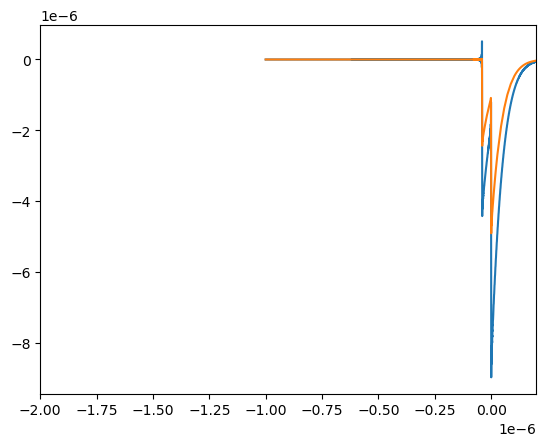

In [27]:
nz=0
plt.plot(xcr.xx/xcr.convr,np.real(Eu1[:,nz]))
plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-2e-6,0.2e-6)


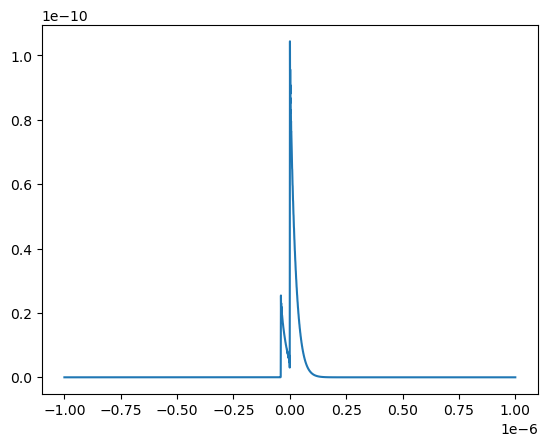

In [28]:
plt.plot(xcr.xx/xcr.convr,Ints1[:,0])

In [29]:
xcr.u.shape,2*xcr.xxmax/xcr.convr/(xcr.xgrid-1),xcr.Z/xcr.convr,xcr.d/xcr.convr,xcr.lam0,np.max(xcr.kkx)

((4001, 1, 1000),
 4.999999999999999e-10,
 1.1452468612127734e-09,
 1.287e-10,
 8.856013786374246e-11,
 0.08858227789820838)

In [30]:
xcr.k0

0.3440564796571191

In [31]:
 xcr.ele_susceptH1

(2.8722226912914497e-06-1.2392944605404412e-07j)

In [32]:
jv(1, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * 1)

(0.00012427587279406516-5.362202548443774e-06j)

In [33]:
  def ksih0_select(self, xcr, params):
        
        d_i,k = params
        jv0_pp1 = jv(0, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH1 * xcr.Z * d_i / 2.0 / xcr.cosa)**2 / 2.0) -1
        jv0_pp2 = jv(0, 2.0 * xcr.ele_susceptH2 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH2 * xcr.Z * d_i / 2.0 / xcr.cosa)**2 / 2.0) -1
          
        tr1 =np.zeros_like(xcr.Xx, dtype=complex)
        tr2 = np.zeros_like(xcr.Xx, dtype=complex)
        idx_nonzero1 = self.log_h1h2_film(xcr,k)
        idx_nonzero2 = self.log_h1h2(xcr,k)
        tr1[idx_nonzero1] = jv0_pp1
        tr2[idx_nonzero2] = jv0_pp2
        tr= 1+tr1+tr2
        if k==100:
                print('ksih1_m_select',tr)
                plt.plot(np.real(tr-1),'b-')
                plt.plot(np.imag(tr-1),'b+-')
                plt.show()
                #plt.xlim(1400,1600)

        return tr


In [34]:
(2.356e-05/2-1j*1.695e-06/2)

(1.178e-05-8.475e-07j)

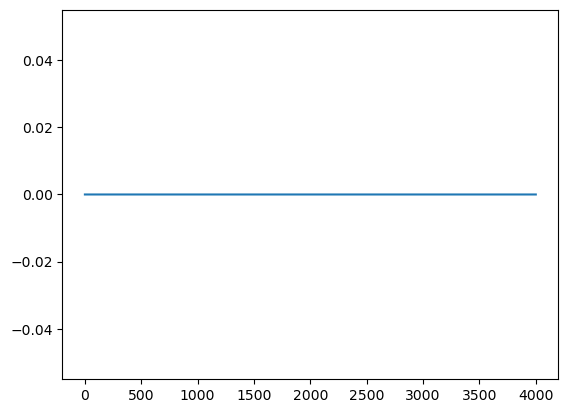

In [35]:
plt.plot(xcr.u[:,0,1])

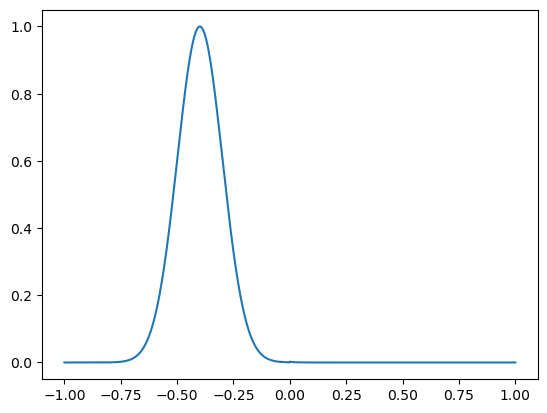

In [77]:
plt.plot(xcr.xx/xcr.convr*1e6,Ints[:,0])
#plt.xlim(-4,-6)

In [78]:
xcr.om0/xcr.convr,xcr.omZ/xcr.convr,xcr.zR/xcr.convr,xcr.zX/xcr.convr,xcr.x00/xcr.convr

(2e-07, 2e-07, 0.0014189646625995137, 0.0, -4e-07)

In [79]:
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2
En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 
U2_xyz[0,200,0,1],U2_xyz.shape,xcr.E0

((-8.175092565921717e-05+0.001800354043664022j), (1, 4001, 1, 501), 1.0)

In [80]:
xcr.om0/xcr.convr

2e-07

In [81]:
xcr.z1.shape,xcr.u.shape,1.6*65

((1000,), (4001, 1, 1000), 104.0)

In [82]:
2*xcr.xxmax/xcr.xgrid/xcr.convr, xcr.Z/xcr.convr

(4.998750312421895e-10, 2.491825576115567e-09)

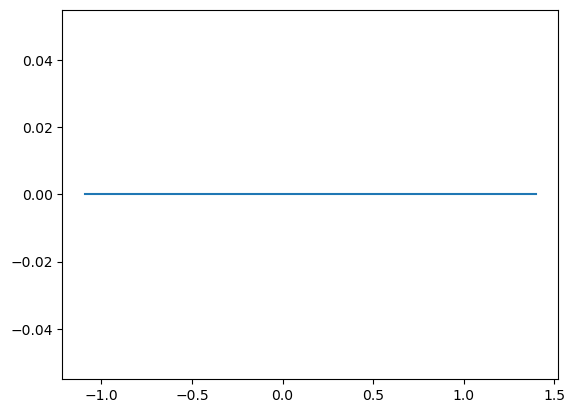

In [83]:
plt.plot(xcr.z1/xcr.convr*1e6,xcr.u[0,0,:]/xcr.convr)

In [84]:
xcr.Z/xcr.convr

2.491825576115567e-09

In [85]:
 xcr.alphaB/np.pi*180

20.12421042237483

In [86]:
xcr.omega, xcr.lam0,xcr.lam

(14000.0, 8.856013786374246e-11, 8.856013786374246e-11)

In [87]:
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2
En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 


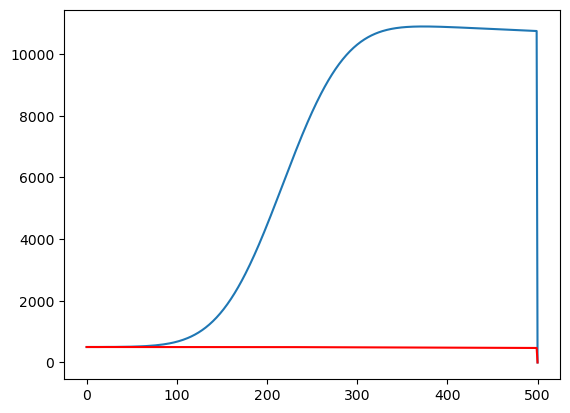

In [88]:
plt.plot(En)
plt.plot((EnSumInt),'r')
#plt.ylim(300,330)
plt.show()
